In [ ]:
from tensorflow.keras.layers import Input,Flatten,Dense, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from tensorflow.keras.preprocessing import image
import numpy as np
from glob import glob


In [ ]:
train_dir='/content/drive/MyDrive/dataset/CottonDisease/train'
val_dir='/content/drive/MyDrive/dataset/CottonDisease/val'
test_dir='/content/drive/MyDrive/dataset/CottonDisease/test'

In [ ]:
imageSize=[224,224]

In [ ]:
inception=InceptionV3(include_top=False,weights='imagenet',input_shape=imageSize+[3])

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable=False

In [ ]:
folders=glob(train_dir+'/*')
len(folders)

4

In [ ]:
x=Flatten()(inception.output)
op=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=inception.inputs,outputs=op)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)
test_gen=ImageDataGenerator(
    rescale=1./255
)
val_gen=ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_data=train_gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)
test_data=test_gen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)
val_data=val_gen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32
)

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plotImages(images):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for image,ax in zip(images,axes):
    ax.imshow(image)
  plt.tight_layout()
  plt.show()

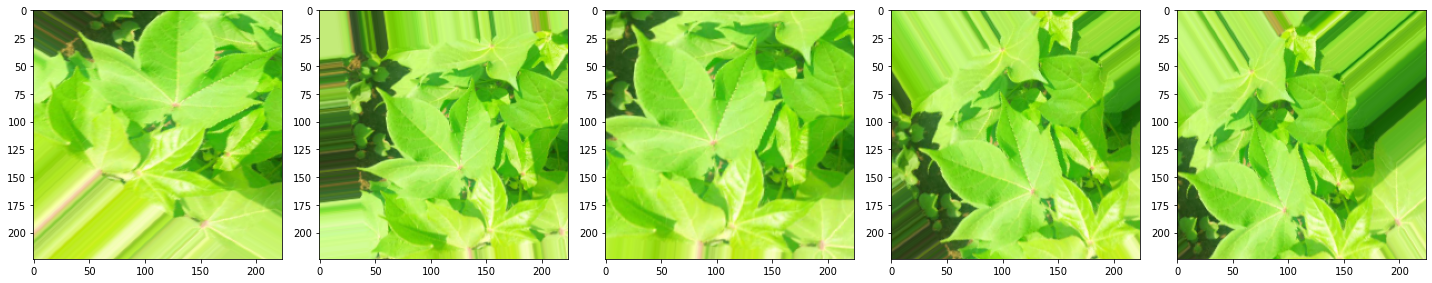

In [ ]:
images=[train_data[0][0][5] for i in range(5)]
plotImages(images)

In [ ]:
history=model.fit_generator(
    train_data,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
    epochs=5
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
61/61 [==============================] - 556s 9s/step - loss: 17.1414 - accuracy: 0.6017 - val_loss: 1.4801 - val_accuracy: 0.8642
Epoch 2/5
61/61 [==============================] - 262s 4s/step - loss: 4.9771 - accuracy: 0.7827 - val_loss: 1.8680 - val_accuracy: 0.8519
Epoch 3/5
61/61 [==============================] - 262s 4s/step - loss: 3.0192 - accuracy: 0.8221 - val_loss: 1.3460 - val_accuracy: 0.8765
Epoch 4/5
61/61 [==============================] - 261s 4s/step - loss: 2.9219 - accuracy: 0.8309 - val_loss: 1.9775 - val_accuracy: 0.8457
Epoch 5/5
61/61 [==============================] - 262s 4s/step - loss: 1.9693 - accuracy: 0.8749 - val_loss: 0.4482 - val_accuracy: 0.9537


Text(0.5, 1.0, 'Training and Validation Loss')

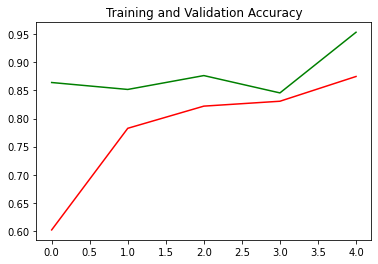

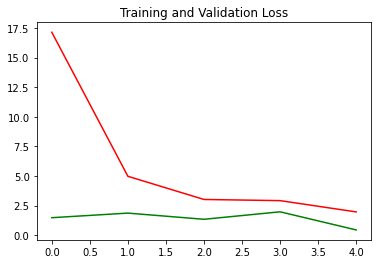

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='g')
plt.title('Training and Validation Accuracy')
plt.figure()
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.title('Training and Validation Loss')

In [ ]:
predArr=model.predict(test_data)
pred=[]
for arr in predArr:
  pred.append(np.argmax(arr))
pred

[3, 2, 1, 3, 0, 3, 3, 0, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1]

In [ ]:
test_data.classes

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_data.classes,pred)
cm

array([[0, 1, 1, 1],
       [2, 0, 0, 3],
       [1, 3, 0, 1],
       [1, 1, 1, 2]])

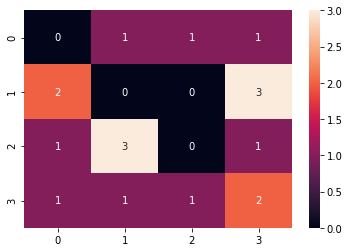

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
model.save('/content/drive/MyDrive/dataset/CottonDisease/inceptionCottonDisease.h5')